## Libraries

In [2]:
# libraries
import numpy as np
import matplotlib.pylab as plt
import scipy.constants as cs

## Semiconductor data

In [3]:
# data for several semiconductors
data = {'Si':{'Eg':1.14,'m_c':0.36,'m_v':0.81},
        'Ge':{'Eg':0.67,'m_c':0.55,'m_v':0.37},
        'GaN':{'Eg':3.34,'m_c':0.2,'m_v':1.4},
        'GaP':{'Eg':2.26,'m_c':0.79,'m_v':0.83},
        'GaAs':{'Eg':1.42,'m_c':0.067,'m_v':0.45},
        'CdS':{'Eg':2.42,'m_c':0.18,'m_v':0.53},
        'CdSe':{'Eg':1.74,'m_c':0.13,'m_v':0.3},
        'CdTe':{'Eg':1.49,'m_c':0.11,'m_v':0.35},
        'ZnSe':{'Eg':2.7,'m_c':0.17,'m_v':1.44},
        'ZnS':{'Eg':3.54,'m_c':0.28,'m_v':1.40},
        'ZnO':{'Eg':3.37,'m_c':0.29,'m_v':1.21},}


## Inputs

In [4]:
# inputs
T = 300 # temperature in kelvin
v_T = np.linspace(300,800,10000)
E_min,E_max = -1,1
v_E = np.linspace(E_min,E_max,10000)

## Functions

In [5]:
def f_gc(element,E):
    """
        Calculates the density of states in the conduction band for a given element and energy.

        Args:
            element (str): Name of the semiconductor element.
            E (float): Energy level (eV).

        Returns:
            float: Density of states in the conduction band (cm^-3 eV^-1).

        Uses the following physical constants from the 'cs' module:
            * elementary_charge (e)
            * Boltzmann constant (k_B)
            * electron mass (m_e)
            * reduced Planck constant (hbar)

        Extracts the following semiconductor parameters from the 'data' dictionary:
            * Band gap energy (Eg) for the given element
            * Effective mass in the conduction band (m_c) relative to the electron mass
            * Effective mass in the valence band (m_v) relative to the electron mass

        The density of states is calculated using the following equation:
            gc = ((m_c / (np.pi**2 * hbar**2)) * np.sqrt(2 * (E - 0.5 * E_g) * m_c / hbar**2)
        """

    # physical constants
    e = cs.elementary_charge
    k_B = cs.Boltzmann / e
    m_e = cs.electron_mass
    hbar = cs.hbar / e

    # semiconductor params
    E_g = data[element]['Eg']
    m_c = m_e * data[element]['m_c']
    m_v = m_e * data[element]['m_v']

    # compute density of states
    if E>0.5*E_g:
        gc = ((m_c)/((np.pi**2)*(hbar**2)))*np.sqrt((2*(E-0.5*E_g)*m_c)/(hbar**2))
    else:
        gc=0.0

    return gc

def f_gv(element,E):
    """
    Calculates the density of states in the valence band for a given element and energy.

    Args:
        element (str): Name of the semiconductor element.
        E (float): Energy level (eV).

    Returns:
        float: Density of states in the valence band (cm^-3 eV^-1).

    Uses the same physical constants and semiconductor parameters as `f_gc`.

    The density of states is calculated using the following equation:
        gv = ((m_v / (np.pi**2 * hbar**2)) * np.sqrt(2 * (0.5 * E_g - E) * m_v / hbar**2)
    """

    # physical constants
    e = cs.elementary_charge
    k_B = cs.Boltzmann / e
    m_e = cs.electron_mass
    hbar = cs.hbar / e

    # semiconductor params
    E_g = data[element]['Eg']
    m_c = m_e * data[element]['m_c']
    m_v = m_e * data[element]['m_v']

    # compute density of states
    if -0.5*E_g>E:
        gv = ((m_v)/((np.pi**2)*(hbar**2)))*np.sqrt((2*(-0.5*E_g-E)*m_v)/(hbar**2))
    else:
        gv=0.0

    return gv

In [6]:
def f_n_i(element,T=300):
    """
    Calculates the intrinsic carrier concentration in a semiconductor.

    This function calculates the intrinsic carrier concentration (n_i) in a 
    semiconductor material based on its element symbol and temperature.

    Args:
        Element (str): Symbol of the semiconductor element.
        T (float, optional): Temperature of the semiconductor in Kelvin. 
            Defaults to 300 K.

    Returns:
        float: Intrinsic carrier concentration (n_i) in cm^-3.

    Raises:
        KeyError: If the provided element symbol is not found in the 
                 data dictionary.

    Uses constants from the 'scipy.constants' (cs) module:
        * k_B: Boltzmann constant
        * e: Elementary charge
        * m_e: Electron mass
        * hbar: Reduced Planck constant
    """

    # physical constants
    e = cs.elementary_charge
    k_B = cs.Boltzmann
    m_e = cs.electron_mass
    hbar = cs.hbar
    
    # semiconductor params
    E_g = data[element]['Eg'] * e 
    m_c = m_e * data[element]['m_c']
    m_v = m_e * data[element]['m_v']

    N_c = 0.25*((2 * m_c * k_B * T)/(np.pi*hbar**2))**(3.0/2.0)
    P_v = 0.25*((2 * m_v * k_B * T)/(np.pi*hbar**2))**(3.0/2.0)

    n_i = np.sqrt(N_c*P_v)*np.exp(-E_g/(2.0*k_B*T))/1e6

    return n_i

In [7]:
def f_Ef(element,doping,da_flag='D',T=300):

    """
    Calculates the Fermi energy level (E_f) in a semiconductor.

    Args:
        element (str): Name of the semiconductor element.
        doping (float): Doping concentration (cm^-3).
        da_flag (str, optional): Acceptor/Donor flag ('A' for acceptor, 'D' for donor). Defaults to 'D'.
        T (float, optional): Temperature (K). Defaults to 300.

    Returns:
        float: The Fermi energy level (E_f) in eV.

    Raises:
        ValueError: If da_flag is not 'A' or 'D'.

    Uses the following constants from the 'cs' module:
        e: elementary charge (C)
        k_B: Boltzmann constant (eV/K)
        m_e: electron mass (kg)
        hbar: reduced Planck constant (eV*s)

    Requires the following data from a source (not provided here):
        data[element]: Dictionary containing semiconductor parameters for the given element.
            - 'Eg': band gap energy (eV)
            - 'm_c': effective mass of conduction band (m_e)
            - 'm_v': effective mass of valence band (m_e)

    This function calculates the Fermi energy level based on the doping concentration,
    temperature, and acceptor/donor flag. It uses the intrinsic carrier concentration
    obtained from the `f_n_i` function (assumed to be defined elsewhere).
    """

    # physical constants
    e = cs.elementary_charge
    k_B = cs.Boltzmann / e
    m_e = cs.electron_mass
    hbar = cs.hbar / e
    
    # semiconductor params
    E_g = data[element]['Eg']
    m_c = m_e * data[element]['m_c']
    m_v = m_e * data[element]['m_v']

    # compute intrinsic carrier concentration
    n_i = f_n_i(element,T=T)

    # Fermi energy level
    if da_flag == 'D':
        E_f = 0.75*k_B*T*np.log(m_v/m_c) + k_B*T*np.log(doping/n_i)
    else:
        E_f = 0.75*k_B*T*np.log(m_v/m_c) - k_B*T*np.log(doping/n_i)

    return E_f

In [8]:
def fd(E,Ef,T=300):
    """Calculates the Fermi-Dirac distribution function.

    This function calculates the Fermi-Dirac distribution function, which describes
    the probability of finding a fermion in a state with energy E at temperature T.

    Args:
        E: The energy of the state (eV).
        Ef: The Fermi energy (eV).
        T: The temperature (K).

    Returns:
        The Fermi-Dirac distribution function at energy E.
    """

    # constants
    k_B = cs.Boltzmann/cs.elementary_charge

    return 1.0/(1.0 + np.exp((E-Ef)/(k_B*T)))

## Performing the calculations

In [9]:
v_gc,v_gv = np.array([f_gc('Si',E) for E in v_E]),np.array([f_gv('Si',E) for E in v_E])
E_g = data['Si']['Eg']
n_i = f_n_i('Si')
doping = 0.0 # 1e6*n_i
E_f = f_Ef('Si',doping+n_i,da_flag='D')
E_fi = f_Ef('Si',n_i,da_flag='D')
print(E_f)
v_fd_c = np.array([fd(E,E_f) for E in v_E])
v_fd_v = 1-v_fd_c

# filtered array
E_ff = 0.0001
v_Ec_f = v_E[v_E>0.5*E_g-E_ff]
v_gc_f = v_gc[v_E>0.5*E_g-E_ff]
v_fd_c_f = v_fd_c[v_E>0.5*E_g-E_ff]
v_Ev_f = v_E[v_E<-0.5*E_g+E_ff]
v_gv_f = v_gv[v_E<-0.5*E_g+E_ff]
v_fd_v_f = v_fd_v[v_E<-0.5*E_g+E_ff]

# norm arrays
v_gc_n = v_gc/np.max(v_gc)
v_gv_n = v_gv/np.max(v_gv)
v_gc_fn = v_gc_f/np.max(v_gv_f)
v_gv_fn = v_gv_f/np.max(v_gv_f)

# normalized carrier density
v_nc = v_gc_f*v_fd_c_f
v_nv = v_gv_f*v_fd_v_f
nc_max = np.max(v_gc_f*v_fd_c_f)
nv_max = np.max(v_gv_f*v_fd_v_f)
nn_max = max(nc_max,nv_max)


0.015723125832328988


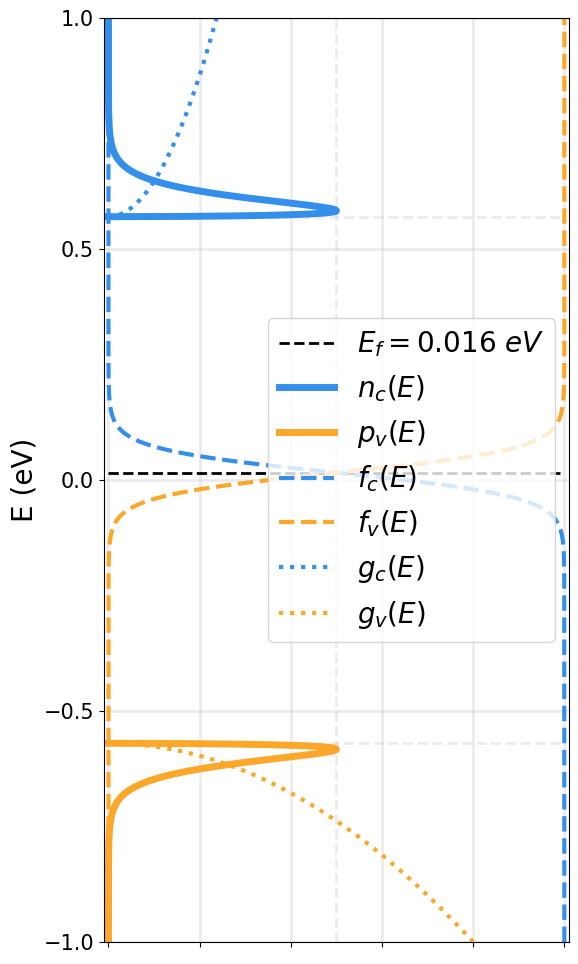

In [10]:
fig,ax = plt.subplots(figsize=(6,12))
f_size = 20

# marker lines
ax.hlines(E_f,0,1.0,linewidth=2.0,linestyle='dashed',color='black',label=r'$E_f=$' + str(np.round(E_f,3)) + ' $eV$')
ax.hlines(0.5*E_g,0,1.0,linewidth=2.0,linestyle='dashed',color='0.7',alpha=0.25)
ax.hlines(-0.5*E_g,0,1.0,linewidth=2.0,linestyle='dashed',color='0.7',alpha=0.25)
ax.vlines(0.5,-1,1,linewidth=2.0,linestyle='dashed',color='0.7',alpha=0.25)

# normalized electron density
ax.plot(0.5*v_nc/nn_max,v_Ec_f,linewidth=5.0,color='#348feb',label=r'$n_c(E)$')
ax.plot(0.5*v_nv/nn_max,v_Ev_f,linewidth=5.0,color='#faa72a',label=r'$p_v(E)$')

# Fermi-Dirac distribution
ax.plot(v_fd_c,v_E,color='#348feb',linestyle='dashed',linewidth=3.0,label=r'$f_c(E)$')
ax.plot(v_fd_v,v_E,color='#faa72a',linestyle='dashed',linewidth=3.0,label=r'$f_v(E)$')

# Density of states
ax.plot(0.8*v_gc_fn,v_Ec_f,color='#348feb',linewidth=3.0,linestyle='dotted',label=r'$g_c(E)$')
ax.plot(0.8*v_gv_fn,v_Ev_f,color='#faa72a',linewidth=3.0,linestyle='dotted',label=r'$g_v(E)$')
ax.grid(color='0.7',linewidth=2.0,alpha=0.25)

#limits
ax.set_xlim(-0.01,1.01)
ax.set_ylim(-1,1)

# labels
ax.set_xticklabels([])
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_ylabel('E (eV)', fontsize=f_size)
ax.tick_params(labelsize=f_size-5)

# legend
ax.legend(fontsize=f_size,loc='center right')

## Carrier Concentration

In [11]:
"{:.2E}".format(f_n_i('Si'))

'2.65E+09'

## Carrier Concentration Vs Temperature

In [12]:
# Carrier concentration for different T
v_ni = np.array([f_n_i('Si',T) for T in v_T])

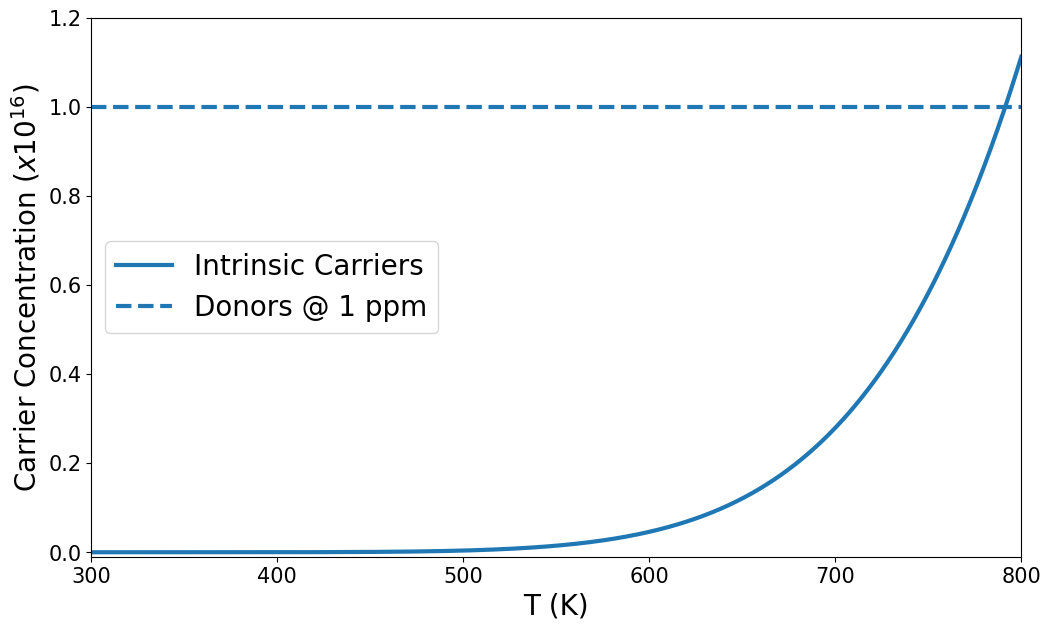

In [22]:
fig, ax = plt.subplots(figsize=(12,7))

# plot
ax.plot(v_T,v_ni/1e16,linewidth = 3.0,label='Intrinsic Carriers')
ax.hlines(1,300,800,linestyle='dashed',linewidth = 3.0,label='Donors @ 1 ppm')

# linits
ax.set_xlim(300,800)
ax.set_ylim(-0.01,1.2)

# labels
ax.set_xlabel('T (K)',fontsize=f_size)
ax.set_ylabel('Carrier Concentration ($x10^{16}$)',fontsize=f_size)

# ticks
ax.tick_params(labelsize=f_size-5)

# legend
ax.legend(fontsize=f_size,loc='center left')